In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd ./drive/MyDrive/AutonomousDriving

/content/drive/MyDrive/AutonomousDriving


In [ ]:
!git clone --recursive https://github.com/chris28negu/PointRCNN.git

Cloning into 'PointRCNN'...
remote: Enumerating objects: 88, done.
remote: Total 88 (delta 0), reused 0 (delta 0), pack-reused 88
Unpacking objects: 100% (88/88), done.
Submodule 'pointnet2_lib' (https://github.com/sshaoshuai/Pointnet2.PyTorch.git) registered for path 'pointnet2_lib'
Cloning into '/content/drive/MyDrive/AutonomousDriving/PointRCNN/pointnet2_lib'...
remote: Enumerating objects: 45, done.        
remote: Total 45 (delta 0), reused 0 (delta 0), pack-reused 45        
Submodule path 'pointnet2_lib': checked out '5a4416f51ceaeba242828cabf39133433336850d'


In [3]:
%cd ./PointRCNN

/content/drive/MyDrive/AutonomousDriving/PointRCNN


In [ ]:
#To check if GPU is running or not, run following command
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Wed Aug  5 23:29:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+

In [4]:
!pip install torch==1.0.0 torchvision==0.2.1
!pip install fire
!pip install tensorboardX

     |████████████████████████████████| 591.8MB 30kB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 81kB 3.6MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111006 sha256=2dacfbe8f93c7367f084b1f54d095330011c3b556576f258056978c291117b74
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire
     |████████████████████████████████| 317kB 5.4MB/s 


In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.is_available())

1.0.0
9.0.176
7401
True


In [5]:
!sh build_and_install.sh

running install
running bdist_egg
running egg_info
writing pointnet2.egg-info/PKG-INFO
writing dependency_links to pointnet2.egg-info/dependency_links.txt
writing top-level names to pointnet2.egg-info/top_level.txt
writing manifest file 'pointnet2.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
creating build/bdist.linux-x86_64/egg
copying build/lib.linux-x86_64-3.6/pointnet2_cuda.cpython-36m-x86_64-linux-gnu.so -> build/bdist.linux-x86_64/egg
creating stub loader for pointnet2_cuda.cpython-36m-x86_64-linux-gnu.so
byte-compiling build/bdist.linux-x86_64/egg/pointnet2_cuda.py to pointnet2_cuda.cpython-36.pyc
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying pointnet2.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying pointnet2.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying pointnet2.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying pointnet2.egg-in

In [6]:
%cd ./tools

/content/drive/My Drive/AutonomousDriving/PointRCNN/tools


In [ ]:
import os

label_dir = "../data/KITTI/object/training/label_2/"
label_list = os.listdir(label_dir)
label_list.sort()

for label_file in label_list:
  label_path = os.path.join(label_dir, label_file)
  
  fin = open(label_path, "rt")
  data = fin.read()
  data = data.replace('VEHICLE', 'Car')
  data = data.replace('PEDESTRIAN', 'Pedestrian')
  data = data.replace('BICYCLIST', 'Cyclist')
  fin.close()

  fin = open(label_path, "wt")
  fin.write(data)
  fin.close()
  print(label_file)

print("done!")

Training

In [9]:
#generate the ground truth database
!python generate_gt_database.py --class_name 'Car' --split train

process gt sample (id=000000)
process gt sample (id=000003)
process gt sample (id=000007)
No gt object
process gt sample (id=000009)
No gt object
process gt sample (id=000010)
process gt sample (id=000011)
No gt object
process gt sample (id=000012)
No gt object
process gt sample (id=000013)
No gt object
process gt sample (id=000014)
process gt sample (id=000016)
process gt sample (id=000017)
process gt sample (id=000018)
process gt sample (id=000022)
No gt object
process gt sample (id=000026)
No gt object
process gt sample (id=000029)
No gt object
process gt sample (id=000030)
No gt object
process gt sample (id=000032)
No gt object
process gt sample (id=000034)
No gt object
process gt sample (id=000036)
No gt object
process gt sample (id=000038)
No gt object
process gt sample (id=000041)
No gt object
process gt sample (id=000043)
No gt object
process gt sample (id=000044)
No gt object
process gt sample (id=000045)
No gt object
process gt sample (id=000046)
No gt object
process gt sampl

In [14]:
#Training of RPN stage
!python train_rcnn.py --cfg_file cfgs/default.yaml \
    --ckpt ../output/rpn/default/ckpt/checkpoint_epoch_200.pth \
    --batch_size 16 --train_mode rpn --epochs 200 --ckpt_save_interval 10

Streaming output truncated to the last 5000 lines.
train:  67% 10/15 [00:19<00:07,  1.43s/it, total_it=729]
epochs:  24% 48/200 [18:26<55:53, 22.06s/it, rpn_loss=1.84, loss=1.84, lr=0.0014]
train:  73% 11/15 [00:20<00:04,  1.17s/it, total_it=730]
epochs:  24% 48/200 [18:27<55:53, 22.06s/it, rpn_loss=1.95, loss=1.95, lr=0.0014]
train:  80% 12/15 [00:20<00:02,  1.01it/s, total_it=731]
epochs:  24% 48/200 [18:27<55:53, 22.06s/it, rpn_loss=1.84, loss=1.84, lr=0.0014]
train:  87% 13/15 [00:21<00:01,  1.16it/s, total_it=732]
epochs:  24% 48/200 [18:28<55:53, 22.06s/it, rpn_loss=1.81, loss=1.81, lr=0.0014]
train:  93% 14/15 [00:21<00:00,  1.30it/s, total_it=733]
epochs:  24% 48/200 [18:29<55:53, 22.06s/it, rpn_loss=1.78, loss=1.78, lr=0.00141]
train: 100% 15/15 [00:22<00:00,  1.41it/s, total_it=734]
epochs:  24% 48/200 [18:29<55:53, 22.06s/it, rpn_loss=2.02, loss=2.02, lr=0.00141]
                                                        
train:   0% 0/15 [00:00<?, ?it/s]
epochs:  24% 49/200 [1

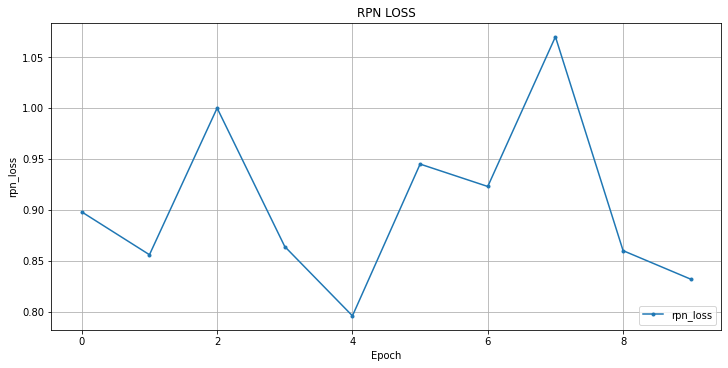

In [15]:
import matplotlib.pyplot as plt

rpn_loss = [0.898, 0.856, 1, 0.864, 0.796, 0.945, 0.923, 1.07, 0.86, 0.832]

fig, ax = plt.subplots(constrained_layout=True, figsize=(10,5))
ax.plot(range(0, 10), rpn_loss, marker='.', label='rpn_loss')
ax.set_title('RPN LOSS')
ax.set_xlabel('Epoch')
ax.set_ylabel('rpn_loss')
ax.grid(True)
ax.legend(loc="lower right")
plt.show()

fig.savefig("rpn_loss.pdf")

In [16]:
#Training of RCNN stage
!python train_rcnn.py --cfg_file cfgs/default.yaml \
    --ckpt ../output/rcnn/default/ckpt/checkpoint_epoch_50.pth \
    --batch_size 4 --train_mode rcnn \
    --epochs 70  --ckpt_save_interval 5 \
    --rpn_ckpt ../output/rpn/default/ckpt/checkpoint_epoch_200.pth

Streaming output truncated to the last 5000 lines.
train:  68% 42/62 [00:56<00:25,  1.26s/it, total_it=1901]
epochs:  43% 30/70 [40:48<52:56, 79.40s/it, reg_fg_sum=126, loss=1.74, lr=0.00198]
train:  69% 43/62 [00:57<00:23,  1.22s/it, total_it=1902]
epochs:  43% 30/70 [40:49<52:56, 79.40s/it, reg_fg_sum=128, loss=1.32, lr=0.00198]
train:  71% 44/62 [00:58<00:22,  1.23s/it, total_it=1903]
epochs:  43% 30/70 [40:50<52:56, 79.40s/it, reg_fg_sum=129, loss=1.81, lr=0.00198]
train:  73% 45/62 [00:59<00:20,  1.22s/it, total_it=1904]
epochs:  43% 30/70 [40:52<52:56, 79.40s/it, reg_fg_sum=127, loss=1.65, lr=0.00198]
train:  74% 46/62 [01:00<00:19,  1.20s/it, total_it=1905]
epochs:  43% 30/70 [40:53<52:56, 79.40s/it, reg_fg_sum=128, loss=1.9, lr=0.00198]
train:  76% 47/62 [01:02<00:17,  1.15s/it, total_it=1906]
epochs:  43% 30/70 [40:54<52:56, 79.40s/it, reg_fg_sum=129, loss=1.48, lr=0.00198]
train:  77% 48/62 [01:03<00:15,  1.11s/it, total_it=1907]
epochs:  43% 30/70 [40:55<52:56, 79.40s/it, re

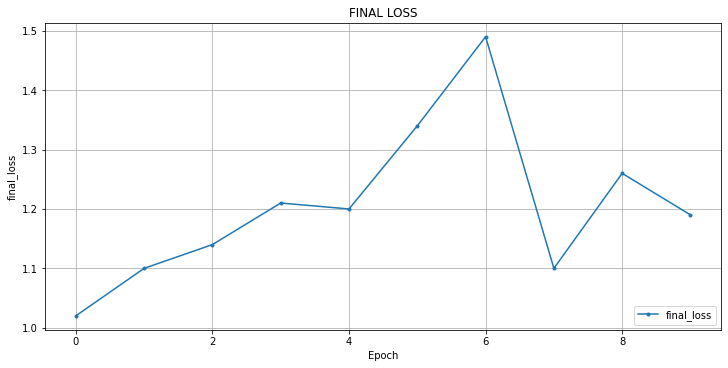

In [17]:
import matplotlib.pyplot as plt

final_loss = [1.02, 1.1, 1.14, 1.21, 1.2, 1.34, 1.49, 1.1, 1.26, 1.19]

fig, ax = plt.subplots(constrained_layout=True, figsize=(10,5))
ax.plot(range(0, 10), final_loss, marker='.', label='final_loss')
ax.set_title('FINAL LOSS')
ax.set_xlabel('Epoch')
ax.set_ylabel('final_loss')
ax.grid(True)
ax.legend(loc="lower right")
plt.show()

fig.savefig("final_loss.pdf")

Inference

In [18]:
# RPN Evaluation
!python eval_rcnn.py --cfg_file cfgs/default.yaml \
    --ckpt ../output/rpn/default/ckpt/checkpoint_epoch_200.pth \
    --batch_size 4 --eval_mode rpn \
    --save_rpn_feature

2020-12-21 04:41:41,427   INFO  **********************Start logging**********************
2020-12-21 04:41:41,428   INFO  cfg_file         cfgs/default.yaml
2020-12-21 04:41:41,429   INFO  eval_mode        rpn
2020-12-21 04:41:41,429   INFO  eval_all         False
2020-12-21 04:41:41,429   INFO  test             False
2020-12-21 04:41:41,429   INFO  ckpt             ../output/rpn/default/ckpt/checkpoint_epoch_200.pth
2020-12-21 04:41:41,429   INFO  rpn_ckpt         None
2020-12-21 04:41:41,429   INFO  rcnn_ckpt        None
2020-12-21 04:41:41,430   INFO  batch_size       4
2020-12-21 04:41:41,430   INFO  workers          4
2020-12-21 04:41:41,430   INFO  extra_tag        default
2020-12-21 04:41:41,430   INFO  output_dir       None
2020-12-21 04:41:41,430   INFO  ckpt_dir         None
2020-12-21 04:41:41,431   INFO  save_result      False
2020-12-21 04:41:41,431   INFO  save_rpn_feature True
2020-12-21 04:41:41,431   INFO  random_select    True
2020-12-21 04:41:41,431   INFO  start_epo

In [19]:
#RCNN Evaluation
!python eval_rcnn.py --cfg_file cfgs/default.yaml \
    --ckpt ../output/rcnn/default/ckpt/checkpoint_epoch_70.pth \
    --batch_size 4 --eval_mode rcnn \
    --save_result --output_dir ../output/results/ \
    #--set RPN.LOC_XZ_FINE False

2020-12-21 04:47:54,943   INFO  **********************Start logging**********************
2020-12-21 04:47:54,944   INFO  cfg_file         cfgs/default.yaml
2020-12-21 04:47:54,944   INFO  eval_mode        rcnn
2020-12-21 04:47:54,944   INFO  eval_all         False
2020-12-21 04:47:54,944   INFO  test             False
2020-12-21 04:47:54,944   INFO  ckpt             ../output/rcnn/default/ckpt/checkpoint_epoch_70.pth
2020-12-21 04:47:54,944   INFO  rpn_ckpt         None
2020-12-21 04:47:54,945   INFO  rcnn_ckpt        None
2020-12-21 04:47:54,945   INFO  batch_size       4
2020-12-21 04:47:54,945   INFO  workers          4
2020-12-21 04:47:54,945   INFO  extra_tag        default
2020-12-21 04:47:54,945   INFO  output_dir       ../output/results/
2020-12-21 04:47:54,945   INFO  ckpt_dir         None
2020-12-21 04:47:54,945   INFO  save_result      True
2020-12-21 04:47:54,945   INFO  save_rpn_feature False
2020-12-21 04:47:54,946   INFO  random_select    True
2020-12-21 04:47:54,946   